In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Objective

In the aviation industry, unexpected failures of jet engines can lead to serious safety risks, costly delays, and inefficient maintenance cycles. To address these challenges, this project focuses on building a predictive maintenance solution using machine learning to estimate the Remaining Useful Life (RUL) of turbofan jet engines.

A turbofan is a type of jet engine widely used in commercial aircraft, where a large fan drives air through both the engine core and around it to produce thrust efficiently. The RUL refers to the number of operating cycles an engine can undergo before it is likely to fail or require major maintenance.

This dataset simulates run-to-failure conditions for 100 turbofan engines, all operating under the same conditions. For each engine, sensor readings and operational data are recorded at every cycle, introducing temporal dependencies that are crucial for accurate RUL prediction. For example, the first 100 rows correspond to engine 1, the next 200 to engine 2, and so on — with each engine running until failure. The data has been preprocessed accordingly to preserve these sequential relationships.

The primary objective of this project is to develop a model that can predict how many cycles are left before engine failure, based on its historical sensor readings. Such insights enable predictive maintenance strategies, helping airlines to:

- Minimize unplanned downtime,

- Extend the lifespan of engines,

- Optimize maintenance planning,

- Reduce operational costs while enhancing safety

# Loading Data

In [ ]:
dftrain=pd.read_csv("train.csv")
dftrain.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (?R),(LPC outlet temperature) (?R),(HPC outlet temperature) (?R),(LPT outlet temperature) (?R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


# Understanding and Cleaning Data

In [ ]:
dftrain.shape

(20631, 26)

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  int64  
 5   (Fan inlet temperature) (?R)             20631 non-null  float64
 6   (LPC outlet temperature) (?R)            20631 non-null  float64
 7   (HPC outlet temperature) (?R)            20631 non-null  float64
 8   (LPT outlet temperature) (?R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [ ]:
dftrain.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (?R),(LPC outlet temperature) (?R),(HPC outlet temperature) (?R),(LPT outlet temperature) (?R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


There are many columns where values are not varying at all. These dont provide useful information and need to be dropped.

In [ ]:
maxcycles=dftrain[["engine", "cycle"]].groupby("engine").max().sort_values(by="cycle", ascending=True)
maxcycles

,cycle
engine,
39,128
91,135
70,137
57,137
24,147
...,...
83,293
67,313
96,336


In [ ]:
maxcycles.loc[10,'cycle']

np.int64(222)

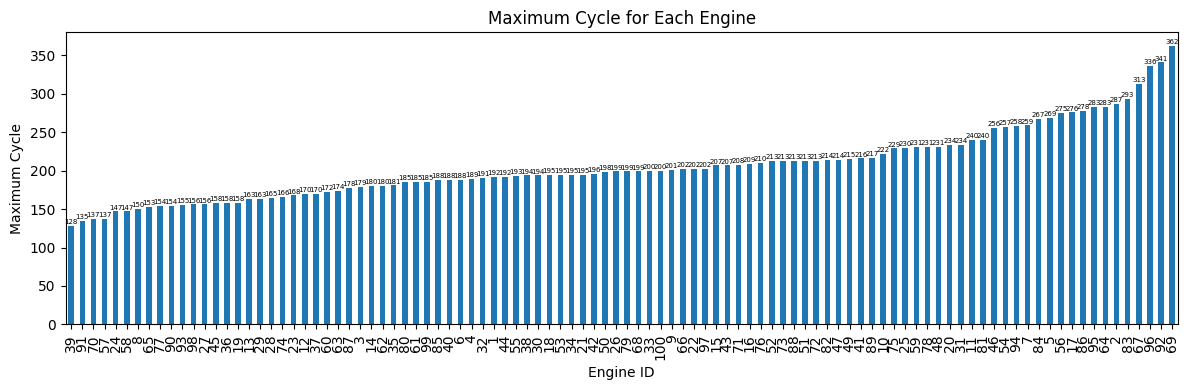

In [ ]:

ax = maxcycles["cycle"].plot(kind="bar", figsize=(12, 4))


for i, v in enumerate(maxcycles["cycle"]):
    ax.text(i, v + 1, str(int(v)), ha='center', va='bottom',fontsize=5)

# Add titles and labels
plt.title("Maximum Cycle for Each Engine")
plt.xlabel("Engine ID")
plt.ylabel("Maximum Cycle")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Minimum number of operating cycles is 128 and maximum is 362.

In [ ]:
subset_stats = dftrain.agg(['mean', 'std','max','min']).T[2:]
subset_stats

,mean,std,max,min
setting_1,-0.000009,2.187313e-03,0.0087,-0.0087
setting_2,0.000002,2.930621e-04,0.0006,-0.0006
setting_3,100.000000,0.000000e+00,100.0000,100.0000
(Fan inlet temperature) (?R),518.670000,6.537152e-11,518.6700,518.6700
(LPC outlet temperature) (?R),642.680934,5.000533e-01,644.5300,641.2100
(HPC outlet temperature) (?R),1590.523119,6.131150e+00,1616.9100,1571.0400
(LPT outlet temperature) (?R),1408.933782,9.000605e+00,1441.4900,1382.2500
(Fan inlet Pressure) (psia),14.620000,3.394700e-12,14.6200,14.6200
(bypass-duct pressure) (psia),21.609803,1.388985e-03,21.6100,21.6000
(HPC outlet pressure) (psia),553.367711,8.850923e-01,556.0600,549.8500


Checking columns showing no variability in data.

In [ ]:
subset_stats[subset_stats['std']==0]

,mean,std,max,min
setting_3,100.0,0.0,100.0,100.0
(Required fan speed),2388.0,0.0,2388.0,2388.0
(Required fan conversion speed),100.0,0.0,100.0,100.0


In [ ]:
sero_std_cols=subset_stats[subset_stats['std']==0].index.tolist()
sero_std_cols

['setting_3', '(Required fan speed)', '(Required fan conversion speed)']

In [ ]:
subset_stats[subset_stats['max']==subset_stats['min']]

,mean,std,max,min
setting_3,100.00,0.000000e+00,100.00,100.00
(Fan inlet temperature) (?R),518.67,6.537152e-11,518.67,518.67
(Fan inlet Pressure) (psia),14.62,3.394700e-12,14.62,14.62
(Engine pressure ratio(P50/P2),1.30,4.660829e-13,1.30,1.30
(Burner fuel-air ratio),0.03,1.556432e-14,0.03,0.03
(Required fan speed),2388.00,0.000000e+00,2388.00,2388.00
(Required fan conversion speed),100.00,0.000000e+00,100.00,100.00


In [ ]:
same_valued_cols=subset_stats[subset_stats['max']==subset_stats['min']].index.tolist()
same_valued_cols

['setting_3',
 '(Fan inlet temperature) (?R)',
 '(Fan inlet Pressure) (psia)',
 '(Engine pressure ratio(P50/P2)',
 '(Burner fuel-air ratio)',
 '(Required fan speed)',
 '(Required fan conversion speed)']

In [ ]:
dftrain.columns

Index(['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3',
       '(Fan inlet temperature) (?R)', '(LPC outlet temperature) (?R)',
       '(HPC outlet temperature) (?R)', '(LPT outlet temperature) (?R)',
       '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(Engine pressure ratio(P50/P2)',
       '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)',
       '(Bypass Ratio)', '(Burner fuel-air ratio)', '(Bleed Enthalpy)',
       '(Required fan speed)', '(Required fan conversion speed)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)'],
      dtype='object')

In [ ]:
dftrain.shape

(20631, 26)

In [ ]:
len(['setting_3','(Required fan speed)','(Required fan conversion speed)',
                      '(Fan inlet temperature) (?R)','(Fan inlet Pressure) (psia)','(Engine pressure ratio(P50/P2)',
                      '(Burner fuel-air ratio)','(Required fan speed)','(Required fan conversion speed)'])

9

Dropping redundant columns

In [ ]:
dftrain.drop(columns=['setting_3','(Required fan speed)','(Required fan conversion speed)',
                      '(Fan inlet temperature) (?R)','(Fan inlet Pressure) (psia)','(Engine pressure ratio(P50/P2)',
                      '(Burner fuel-air ratio)'],inplace=True)
dftrain.shape

(20631, 19)

# Exploratory Data Analysis and Preprocessing


## Correlation Check

Setting a threshold of +/- 0.9 and checking those variables where correlation coefficient crosses that threshold

<Axes: >

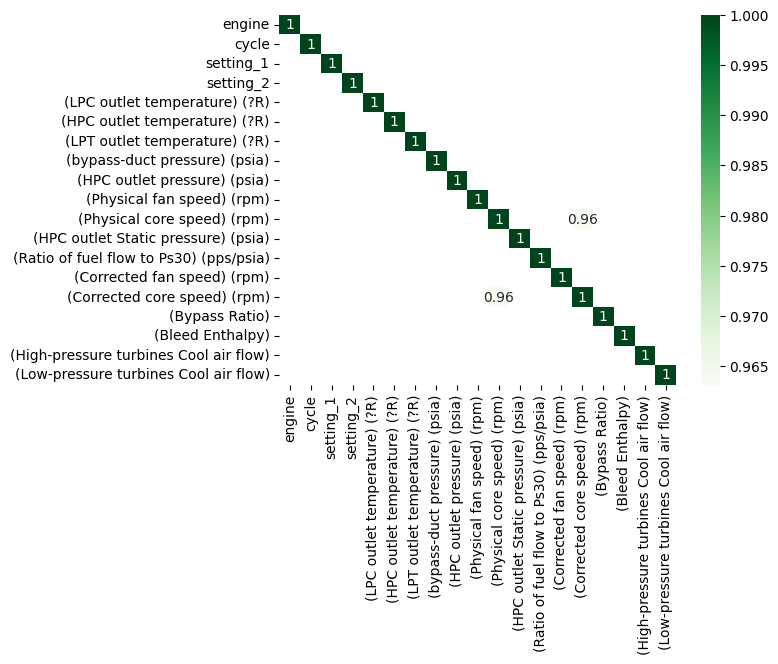

In [ ]:
corr=dftrain.corr()
mask=corr.where((abs(corr) >=0.9)).isna()
sns.heatmap(corr,mask=mask,cmap='Greens',annot=True)

Dropping the highly correlated var (Corrected core speed) (rpm) that crossed the threshold.

In [ ]:
dftrain.drop(columns=['(Corrected core speed) (rpm)'],inplace=True)
dftrain.shape

(20631, 18)

## Adding RUL as target feature.

In [ ]:
dftrain_RUL = dftrain.groupby(['engine']).agg({'cycle':'max'})
dftrain_RUL.rename(columns={'cycle':'life'},inplace=True)

In [ ]:
dftrain_RUL.head()

,life
engine,
1,192
2,287
3,179
4,189
5,269


In [ ]:
dftrain=dftrain.merge(dftrain_RUL,how='left',on=['engine'])
dftrain.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (?R),(HPC outlet temperature) (?R),(LPT outlet temperature) (?R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192


In [ ]:
dftrain['RUL']=dftrain['life']-dftrain['cycle']
dftrain.drop(['life'],axis=1,inplace=True)
dftrain.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (?R),(HPC outlet temperature) (?R),(LPT outlet temperature) (?R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


## Data Visualizations and Analysis

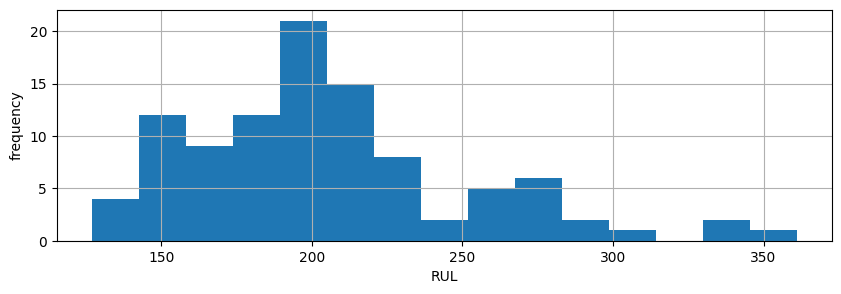

In [ ]:
df_max_rul = dftrain[['engine', 'RUL']].groupby('engine').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(10,3))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

This indicates most engines break down around 200 cycles. Furthermore, the distribution is right skewed, with few engines lasting over 300 cycles

In [ ]:
# def plot_sensor(sensor_name):
#     plt.figure(figsize=(10,3))
#     for i in dftrain['engine'].unique():
#         if (i % 50 == 0):  # only plot every 25th unit_nr
#             plt.plot('RUL', sensor_name,
#                      data=dftrain[dftrain['engine']==i])
#     plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
#     plt.xticks(np.arange(0, 275, 25))
#     plt.ylabel(sensor_name)
#     plt.xlabel('Remaining Useful Life (RUL) ')
#     plt.show()

def plot_sensor(sensor_name):
    plt.figure(figsize=(10,3))
    for i in dftrain['engine'].unique():
        if (i==10):
            plt.plot('RUL', sensor_name,
                     data=dftrain[dftrain['engine']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life (RUL) ')
    plt.show()

In [ ]:
sensor_names=['(LPC outlet temperature) (?R)', '(HPC outlet temperature) (?R)',
       '(LPT outlet temperature) (?R)', '(bypass-duct pressure) (psia)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Bypass Ratio)', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)']

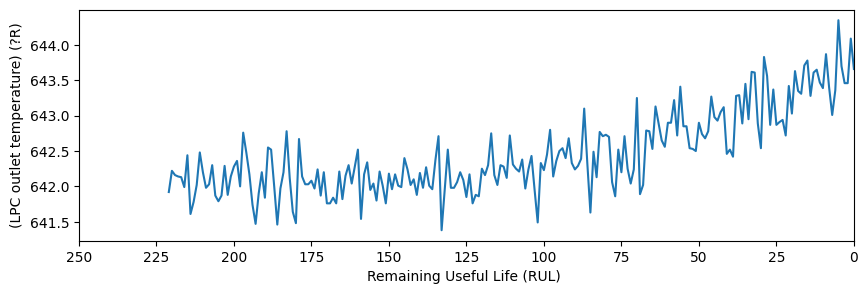

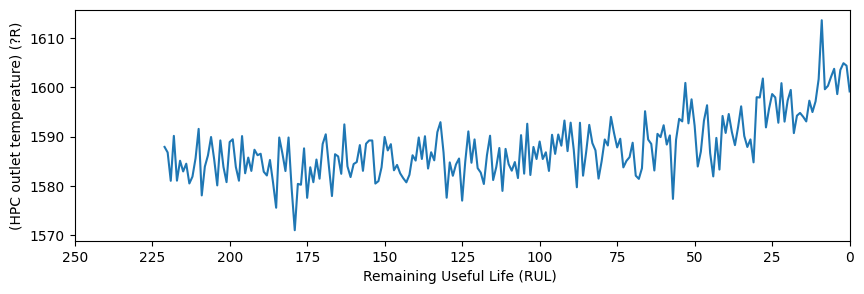

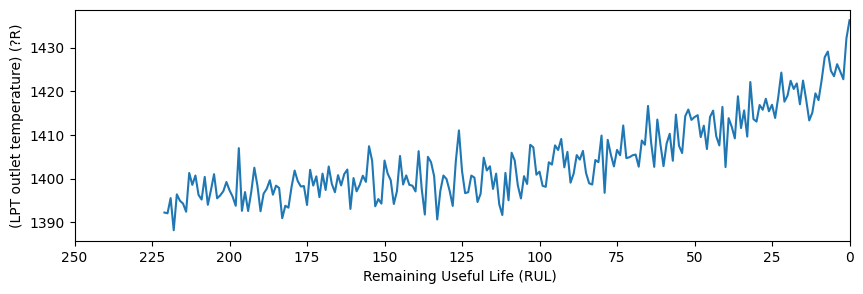

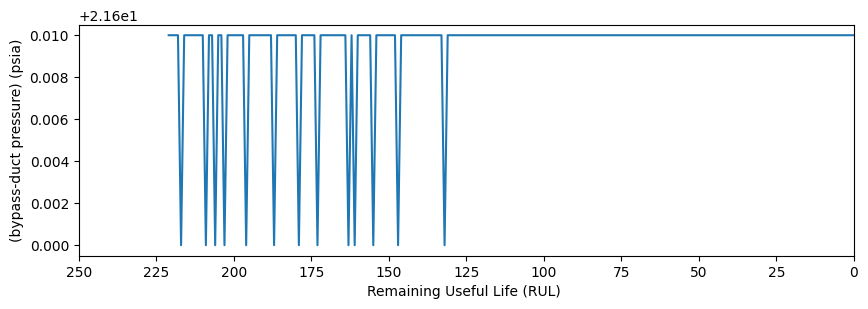

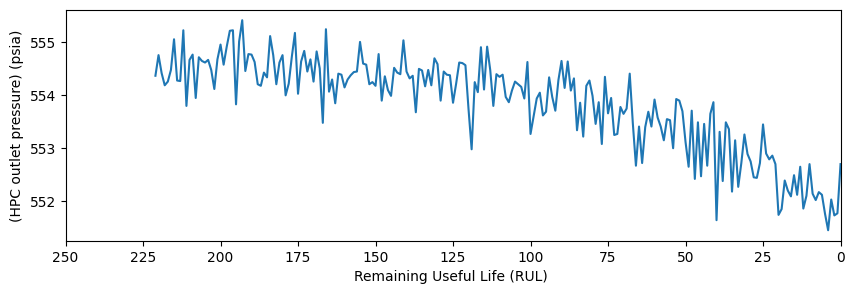

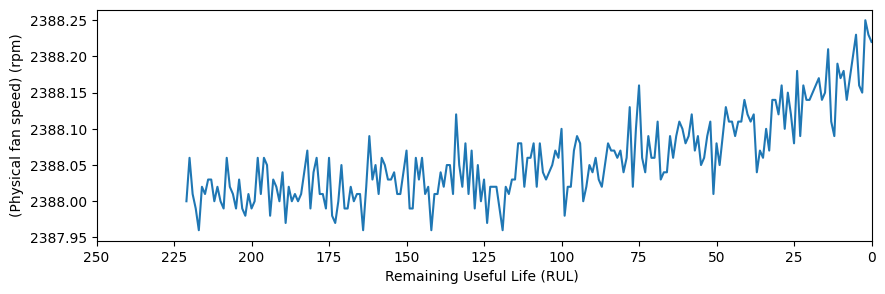

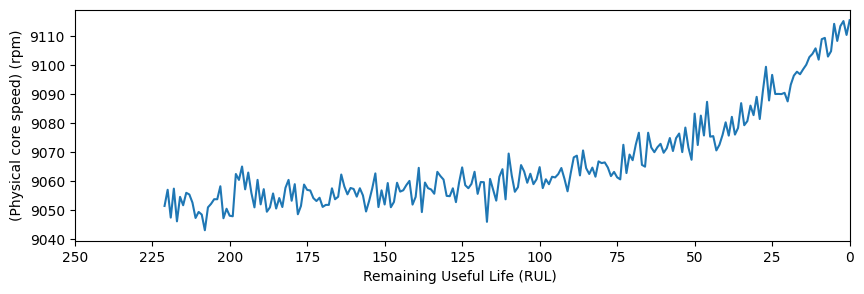

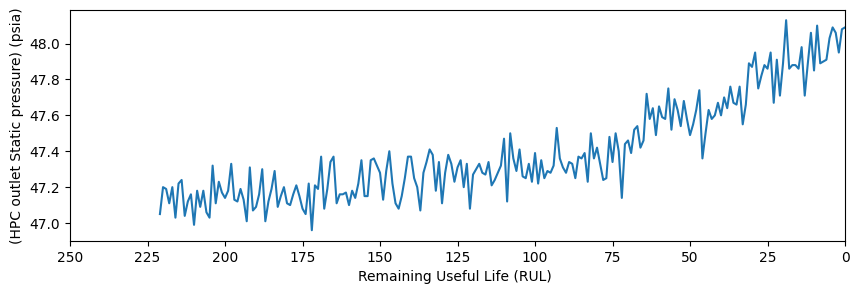

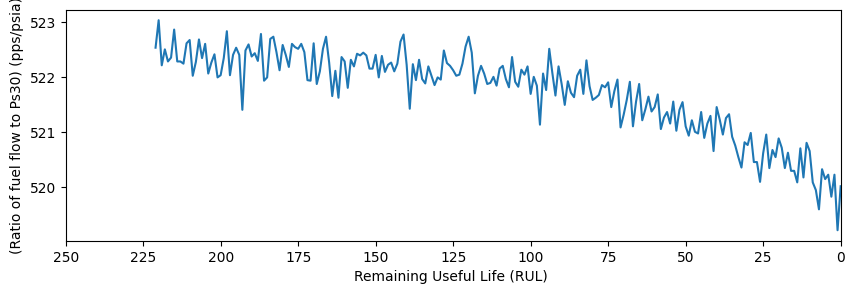

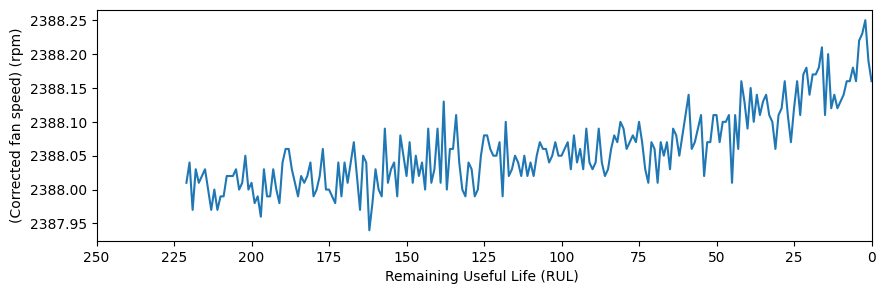

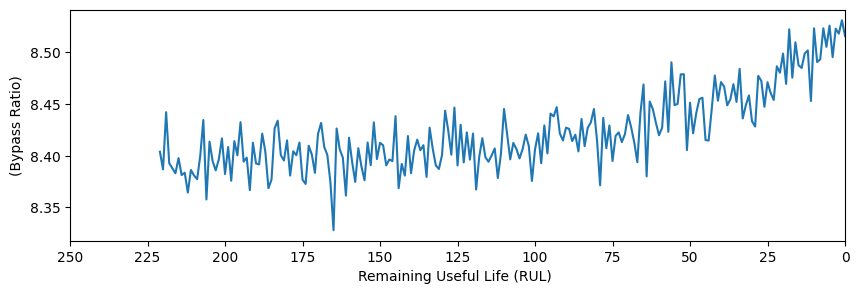

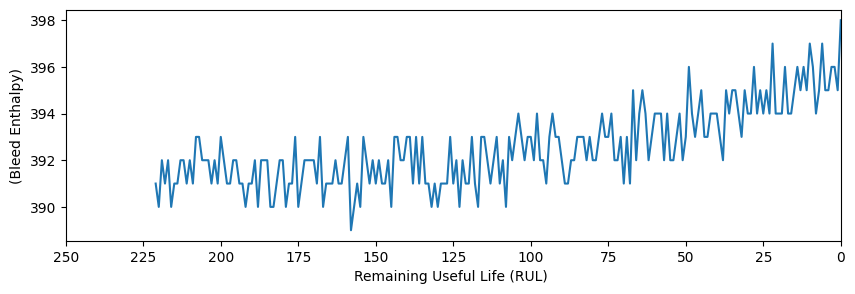

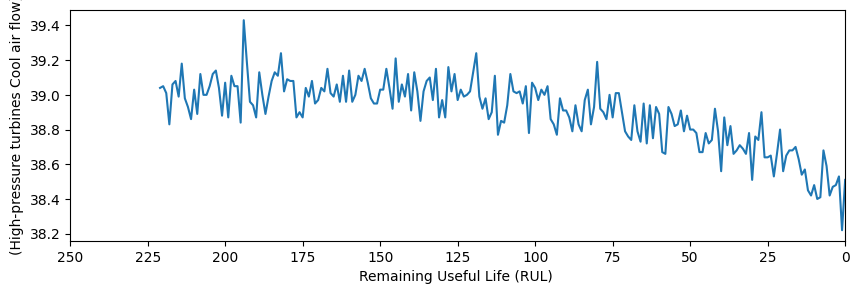

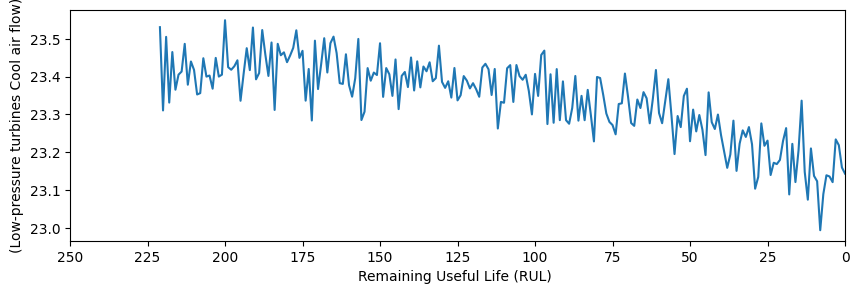

In [ ]:
# plotting data of 10th engine
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

The graphs remain fairly constant at the beginning as faults develop in machines with time and with use. So the initial readings cannot help us predict Remaining Useful Life. The gradual bending in the curves start implying that RUL is declining.

By doing so we achieve two things:
1. Initially constant RUL correlates better with the initially constant mean sensor signal
2. Lower peak values for RUL result in lower spread of our target variable, making it easier to fit a line

The minimum lifetime of an engine as observed from the previous analysis is 128 cycles. We also notice that after 125 cycles (going from left to right), the graph starts bending. So let us clip the RUL as 125.

In [ ]:
dftrain['RUL'][dftrain['RUL']>125]=125

<ipython-input-182-ba96d16616db>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dftrain['RUL'][dftrain['RUL']>125]=125
<ipython-input-182-ba96d16616db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

## Stationarity Tests

In [ ]:
dftrain.columns

Index(['engine', 'cycle', 'setting_1', 'setting_2',
       '(LPC outlet temperature) (?R)', '(HPC outlet temperature) (?R)',
       '(LPT outlet temperature) (?R)', '(bypass-duct pressure) (psia)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Bypass Ratio)', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)', 'RUL'],
      dtype='object')

In [ ]:
# test stationarity using adfuller test
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(dftrain[ '(Physical fan speed) (rpm)'], maxlag=1)
print('all units, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}'.format(pvalue < 0.05))


test_series = dftrain.loc[dftrain['engine']==1, '(Physical fan speed) (rpm)']
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

print('NOTE: Testing one column has values of 100 engines, all engines together are stationary, but single engines are not\n')

all units, single column test results
adf: -30.39734451079817 
pvalue: 0.0
Significant: True
single unit, single column test results
adf: -1.6706941223319334 
pvalue: 0.44627145926749373
Significant: False

NOTE: Testing one column has values of 100 engines, all engines together are stationary, but single engines are not



There are some non stationary series in the sensor data of some engines. Will be segregating the miscellaneous data in meaningful sequences and using deep learning models for RUL prediction.

In [ ]:
dftrain.drop(columns=['setting_1', 'setting_2'],inplace=True)

In [ ]:
dftrain.shape

(20631, 17)

# Scaling Data

In [ ]:
dftrain.columns

Index(['engine', 'cycle', '(LPC outlet temperature) (?R)',
       '(HPC outlet temperature) (?R)', '(LPT outlet temperature) (?R)',
       '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)',
       '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)',
       '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Bypass Ratio)', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)', 'RUL'],
      dtype='object')

In [ ]:
cols_to_scale=['(LPC outlet temperature) (?R)', '(HPC outlet temperature) (?R)',
       '(LPT outlet temperature) (?R)', '(bypass-duct pressure) (psia)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Bypass Ratio)', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dftrain[cols_to_scale] = scaler.fit_transform(dftrain[cols_to_scale])

In [ ]:
dftrain.shape

(20631, 17)

In [ ]:
len(cols_to_scale)

14

# Test Data Loading and Preprocessing

In [ ]:
dftest=pd.read_csv("test.csv")

In [ ]:
cols=[col for col in dftrain.columns if col!='RUL']

In [ ]:
dftest=dftest[cols]

In [ ]:
dftest[cols_to_scale] = scaler.transform(dftest[cols_to_scale])

In [ ]:
dftest.shape

(13096, 16)

# Data Preparation

Segregating the data in meaningful sequences for feeding into the neural networks

In [ ]:
window_length = 30
shift = 1
early_rul = 125
processed_train_data = []
processed_train_targets = []

# How many test windows to take for each engine. If set to 1 (this is the default), only last window of test data for
# each engine is taken. If set to a different number, that many windows from last are taken.
# Final output is the average output of all windows.
num_test_windows = 5
processed_test_data = []
num_test_windows_list = []

In [ ]:
dftrain.shape

(20631, 17)

In [ ]:
dftest.shape

(13096, 16)

In [ ]:
dftrain

,engine,cycle,(LPC outlet temperature) (?R),(HPC outlet temperature) (?R),(LPT outlet temperature) (?R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,125
1,1,2,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,125
2,1,3,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,125
3,1,4,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,125
4,1,5,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,1.0,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.656791,0.750000,0.271318,0.109500,4
20627,100,197,0.701807,0.729453,0.866475,1.0,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.727203,0.583333,0.124031,0.366197,3
20628,100,198,0.665663,0.684979,0.775321,1.0,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.608434,0.746021,0.747468,1.0,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.823394,0.583333,0.116279,0.234466,1


In [ ]:
# train_data = pd.DataFrame(data = np.c_[dftrain['engine'], dftrain])
# train_data

In [ ]:
train_engines=len(dftrain['engine'].unique())
test_engines=len(dftest['engine'].unique())
train_engines,test_engines

(100, 100)

In [ ]:
def process_input_data_with_targets(input_data, target_data, window_length = 1, shift = 1):
    """Depending on values of window_length and shift, this function generates batchs of data and targets
    from input_data and target_data.

    Number of batches = np.floor((len(input_data) - window_length)/shift) + 1

    Arguments:
        input_data: input data to function (Must be 2 dimensional)
        target_data: input rul values (Must be 1D array)s
        window_length: window length of data
        shift: Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of
               29 data points between two consecutive batches.

    """
    num_batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets




def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
    """ This function takes test data for an engine as first input. The next two inputs
    window_length and shift are same as other functins.

    Finally it takes num_test_windows as the last input. num_test_windows sets how many examplles we
    want from test data (from last). By default it extracts only the last example.

    The function return last examples and number of last examples (a scaler) as output.
    We need the second output later. If we are extracting more than 1 last examples, we have to
    average their prediction results. The second scaler halps us do just that.
    """
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [ ]:
for i in np.arange(1, train_engines + 1):
    temp_train_data = dftrain[dftrain['engine'] == i].drop(columns = ['engine','RUL']).values

    # Verify if data of given window length can be extracted from training data
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    temp_train_targets = dftrain[dftrain['engine'] == i]['RUL'].values
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,
                                                                                window_length = window_length, shift = shift)

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

In [ ]:
processed_train_data

array([[[1.00000000e+00, 1.83734940e-01, 4.06801831e-01, ...,
         3.33333333e-01, 7.13178295e-01, 7.24661696e-01],
        [2.00000000e+00, 2.83132530e-01, 4.53019403e-01, ...,
         3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
        [3.00000000e+00, 3.43373494e-01, 3.69522564e-01, ...,
         1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
        ...,
        [2.80000000e+01, 3.43373494e-01, 2.57248746e-01, ...,
         1.66666667e-01, 6.74418605e-01, 5.38387186e-01],
        [2.90000000e+01, 2.10843373e-01, 3.00632221e-01, ...,
         4.16666667e-01, 6.12403101e-01, 6.42778238e-01],
        [3.00000000e+01, 2.98192771e-01, 4.90080663e-01, ...,
         1.66666667e-01, 7.05426357e-01, 7.13615023e-01]],

       [[2.00000000e+00, 2.83132530e-01, 4.53019403e-01, ...,
         3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
        [3.00000000e+00, 3.43373494e-01, 3.69522564e-01, ...,
         1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
        [4.00000000e+00, 

In [ ]:
for i in np.arange(1, test_engines + 1):
    temp_test_data = dftest[dftest['engine'] == i].drop(columns = ['engine']).values

    # Verify if data of given window length can be extracted from training data
    if (len(temp_test_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                             num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)

In [ ]:
processed_test_data

array([[[1.00000000e+00, 5.45180723e-01, 3.10660562e-01, ...,
         3.33333333e-01, 5.58139535e-01, 6.61833748e-01],
        [2.00000000e+00, 1.50602410e-01, 3.79550905e-01, ...,
         4.16666667e-01, 6.82170543e-01, 6.86826843e-01],
        [3.00000000e+00, 3.76506024e-01, 3.46631785e-01, ...,
         4.16666667e-01, 7.28682171e-01, 7.21347694e-01],
        ...,
        [2.80000000e+01, 2.16867470e-01, 5.05995204e-01, ...,
         3.33333333e-01, 5.34883721e-01, 6.29660315e-01],
        [2.90000000e+01, 2.22891566e-01, 3.51209941e-01, ...,
         3.33333333e-01, 6.82170543e-01, 6.46092240e-01],
        [3.00000000e+01, 4.75903614e-01, 3.20034881e-01, ...,
         2.50000000e-01, 7.36434109e-01, 7.07953604e-01]],

       [[2.00000000e+00, 1.50602410e-01, 3.79550905e-01, ...,
         4.16666667e-01, 6.82170543e-01, 6.86826843e-01],
        [3.00000000e+00, 3.76506024e-01, 3.46631785e-01, ...,
         4.16666667e-01, 7.28682171e-01, 7.21347694e-01],
        [4.00000000e+00, 

In [ ]:
true_rul=pd.read_csv("test_RUL.csv",header=None)
true_rul=true_rul.values.flatten()
true_rul

array([112,  98,  69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,
       107,  83,  84,  50,  28,  87,  16,  57, 111, 113,  20, 145, 119,
        66,  97,  90, 115,   8,  48, 106,   7,  11,  19,  21,  50, 142,
        28,  18,  10,  59, 109, 114,  47, 135,  92,  21,  79, 114,  29,
        26,  97, 137,  15, 103,  37, 114, 100,  21,  54,  72,  28, 128,
        14,  77,   8, 121,  94, 118,  50, 131, 126, 113,  10,  34, 107,
        63,  90,   8,   9, 137,  58, 118,  89, 116, 115, 136,  28,  38,
        20,  85,  55, 128, 137,  82,  59, 117,  20])

In [ ]:
print("Processed training data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed training data shape:  (17731, 30, 15)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 15)
True RUL shape:  (100,)


In [ ]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 42)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (14184, 30, 15)
Processed validation data shape:  (3547, 30, 15)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


# Model Building and Evaluation

In [ ]:
model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 15), return_sequences=True),
        layers.LSTM(64, return_sequences = True),
        layers.LSTM(32),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def scheduler(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)



In [ ]:
history = model.fit(processed_train_data, processed_train_targets, epochs = 10,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
111/111 - 15s - 136ms/step - loss: 3574.0969 - val_loss: 1719.9523 - learning_rate: 1.0000e-03

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
111/111 - 20s - 176ms/step - loss: 1177.1619 - val_loss: 794.0505 - learning_rate: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
111/111 - 20s - 184ms/step - loss: 689.4117 - val_loss: 422.9286 - learning_rate: 1.0000e-03

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/10
111/111 - 21s - 193ms/step - loss: 328.8299 - val_loss: 271.5355 - learning_rate: 1.0000e-03

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/10
111/111 - 11s - 97ms/step - loss: 237.2682 - val_loss: 215.7192 - learning_rate: 1.0000e-03

Epoch 6: LearningRateScheduler setting learning rate to 0.0001.
Epoch 6/10
111/111 - 20s - 184ms/step - loss: 183.8725 - val_loss: 180.5829 - learning_rate: 

In [ ]:
from sklearn.metrics import mean_squared_error
rul_pred = model.predict(processed_test_data).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
RMSE:  14.25776227113567


In [ ]:
indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  14.039089671996521


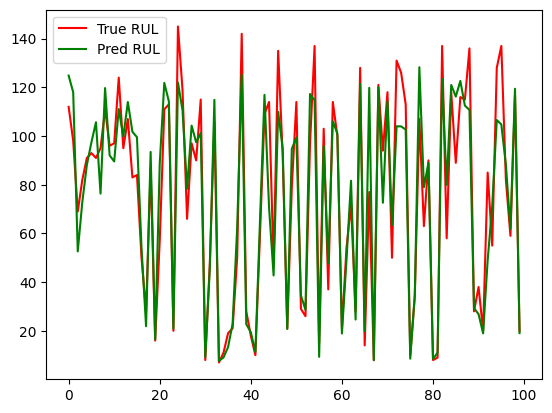

In [ ]:
# Plot true and predicted RUL values
plt.plot(true_rul, label = "True RUL", color = "red")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "green")
plt.legend()
plt.show()

# Conclusion

This project successfully demonstrates a data-driven approach to predicting the Remaining Useful Life (RUL) of turbofan jet engines using sequential sensor data. Through comprehensive data preprocessing — including exploratory analysis, stationarity testing, and temporal sequence generation — the dataset was effectively structured to preserve the time-dependent nature of engine degradation.

A Long Short-Term Memory (LSTM) model was trained on these sequences, capturing the underlying temporal dynamics in engine performance. The model achieved a Root Mean Squared Error (RMSE) of 14, indicating a reasonably strong performance in estimating the number of operational cycles remaining before failure. This level of accuracy makes the model a valuable tool in predictive maintenance planning, helping aviation operators take proactive actions to avoid unexpected failures and optimize engine utilization.

By leveraging time-series deep learning techniques in a real-world maintenance context, this project highlights the practical potential of machine learning to drive safer, more efficient, and cost-effective operations in the aerospace sector.